<a href="https://colab.research.google.com/github/TatianaO8/AI/blob/master/HW_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW 2 (Problem 2)

## Imports

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random data

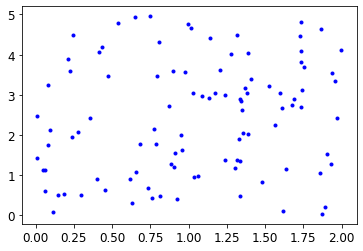

In [396]:
# generate m random pairs (x_1, x_2, y)

m = 100
X_1 = 2 * np.random.rand(m, 1)
X_2 = 5 * np.random.rand(m, 1)
y = X_1 + X_2 

plt.plot(X_1, X_2, "b.")
plt.show()

Text(0.5, 0, 'y')

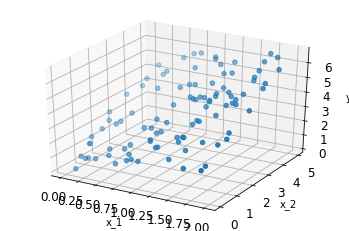

In [397]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_1, X_2, y)
ax.set_xlabel("x_1", fontsize=10)
ax.set_ylabel("x_2", fontsize=10)
ax.set_zlabel("y", fontsize=10)

## Combine bias $b=w_0$ and weight $w_1$

Linear regression predicts $\hat{y}=b + w_1 x_1$. It will be convenient to rewrite this as a dot product.  Define $w=(w_0, w_1)$ and $x=(1, x_1)$.  Then, we have $\hat{y}=w \boldsymbol{\cdot} x$.

In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X_1, X_2])

In [399]:
print(X_b.shape)

(100, 3)


In [400]:
# show the first 5 rows
print(X_b[:5, :])

[[1.         1.32760906 1.90097809]
 [1.         0.94926175 1.9941139 ]
 [1.         1.6883409  2.90086185]
 [1.         1.61134031 2.66801273]
 [1.         1.17070873 3.03952546]]


## Linear regression using batch gradient descent 
All training examples are used to compute the gradient.

In [401]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1) 
print(initial_weight)

[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]]


In [402]:
# sanity check (I will use this to explain how the vectorized code works)
print(initial_weight.shape)
print(y.shape)
print((X_b.dot(initial_weight)).shape)
print((X_b.T.dot(X_b.dot(initial_weight))).shape)

(3, 1)
(100, 1)
(100, 1)
(3, 1)


# Linear regression using mini-batch gradient descent
A few training examples are selected to compute the gradient.

In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

In [404]:
weight_path_mgd[-1]

array([[0.45088908],
       [0.71078326],
       [0.95784328]])

In [0]:
weight_path_mgd = np.array(weight_path_mgd)